# Linear Model 


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from ucimlrepo import fetch_ucirepo

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer, PolynomialFeatures, StandardScaler
from sklearn.svm import SVR

In [3]:
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features 
yq = wine_quality.data.targets
yc = wine_quality.data.original.color

In [4]:
Xq_train, Xq_test, yq_train, yq_test = train_test_split(
    X,
    yq,
    test_size=0.3,
    random_state=42
)

The regression model from the previous exercise is recreated here by setting the same hyperparameters as determined from the grid search.

In [5]:
pipeline_q = Pipeline([
    ('scaler', QuantileTransformer()),
    ('basis_func', PolynomialFeatures(degree=3)),
    ('model', Ridge())
])

pipeline_q.fit(Xq_train, yq_train)

Pipeline(steps=[('scaler', QuantileTransformer()),
                ('basis_func', PolynomialFeatures(degree=3)),
                ('model', Ridge())])

In [6]:
yq_pred_ridge = pipeline_q.predict(Xq_test)
yq_pred_ridge

array([[6.51185926],
       [5.14510495],
       [6.9244753 ],
       ...,
       [6.74045342],
       [6.59700954],
       [5.7751113 ]])

In [57]:
def show_metrics(y_test, y_pred, name):
    y_test = np.array(y_test).reshape((-1, 1))
    y_pred = np.array(y_pred).reshape((-1, 1))
    mse = mean_squared_error(y_test, y_pred)
    nmse = (((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()).squeeze()
    r2 = 1 - nmse
    df = pd.DataFrame({'name': [name], 'mse': [mse], 'nmse': [nmse], 'r2': [r2]})
    return df

In [53]:
show_metrics(yq_test, yq_pred_ridge, 'Ridge')

,name,mse,nmse,r2
0,Ridge,0.46008,0.630558,0.369442


# SVM with Quadratic Kernel

Note that no parameter searching will be peformed here as we want to see the effect of the default SVR but with just the kernel changed. A quadratic kernel is equivalent to a poly kernel but with degree 2.

In [9]:
svm_quadratic = Pipeline([
    ('scaler', QuantileTransformer()),
    ('svr', SVR(kernel='poly', degree=2))
])

svm_quadratic.fit(Xq_train, yq_train.iloc[:, 0])

Pipeline(steps=[('scaler', QuantileTransformer()),
                ('svr', SVR(degree=2, kernel='poly'))])

In [10]:
yq_pred_svm_quad = svm_quadratic.predict(Xq_test)
yq_pred_svm_quad

array([6.39636609, 4.8788255 , 6.68064474, ..., 6.5587895 , 6.59490602,
       5.40173937])

In [54]:
show_metrics(yq_test, yq_pred_svm_quad, 'SVM Quadratic Kernel')

,name,mse,nmse,r2
0,SVM Quadratic Kernel,0.488645,0.669707,0.330293


# SVM with Cubic Kernel

Note that no parameter searching will be peformed here as we want to see the effect of the default SVR but with just the kernel changed. A cubic kernel is equivalent to a poly kernel but with degree 3.

In [12]:
svm_cubic = Pipeline([
    ('scaler', QuantileTransformer()),
    ('svr', SVR(kernel='poly', degree=3))
])

svm_cubic.fit(Xq_train, yq_train.iloc[:, 0])

Pipeline(steps=[('scaler', QuantileTransformer()), ('svr', SVR(kernel='poly'))])

In [13]:
yq_pred_svm_cubic = svm_cubic.predict(Xq_test)
yq_pred_svm_cubic

array([6.99655328, 5.1556131 , 6.78273478, ..., 6.69112775, 6.86108225,
       5.61943598])

In [55]:
show_metrics(yq_test, yq_pred_svm_cubic, 'SVM Cubic Kernel')

,name,mse,nmse,r2
0,SVM Cubic Kernel,0.479878,0.657691,0.342309


# SVM with RBF Kernel

Note that no parameter searching will be peformed here as we want to see the effect of the default SVR but with just the kernel changed. An RBF kernel is selected here.

In [127]:
svm_rbf = Pipeline([
    ('scaler', QuantileTransformer()),
    ('svr', SVR(kernel='rbf'))
])

svm_rbf.fit(Xq_train, yq_train.iloc[:, 0])

Pipeline(steps=[('scaler', QuantileTransformer()), ('svr', SVR())])

In [128]:
yq_pred_svm_rbf = svm_rbf.predict(Xq_test)
yq_pred_svm_rbf

array([6.09383441, 5.10506094, 6.87491137, ..., 6.84511746, 6.51756588,
       5.63203949])

In [129]:
show_metrics(yq_test, yq_pred_svm_rbf, 'SVM RBF Kernel')

,name,mse,nmse,r2
0,SVM RBF Kernel,0.45055,0.617496,0.382504


# Comparison

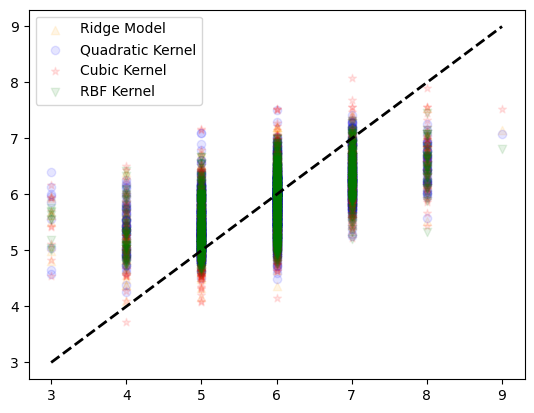

In [130]:
plt.scatter(yq_test, yq_pred_ridge, marker='^', color='orange', alpha=0.1, label='Ridge Model')
plt.scatter(yq_test, yq_pred_svm_quad, marker='o', color='blue', alpha=0.1, label='Quadratic Kernel')
plt.scatter(yq_test, yq_pred_svm_cubic, marker='*', color='red', alpha=0.1, label='Cubic Kernel')
plt.scatter(yq_test, yq_pred_svm_rbf, marker='v', color='green', alpha=0.1, label='RBF Kernel')
plt.plot([yq_test.min(), yq_test.max()], [yq_test.min(), yq_test.max()], 'k--', lw=2)
plt.legend();

A comparison of the actual vs predicted across different models is shown here. The closer the datasets are to the 45 degree line, the more accurate the model. However in this case, it is very hard to see the distinctions between each model even with a low opacity hence this plot will be recreated below.

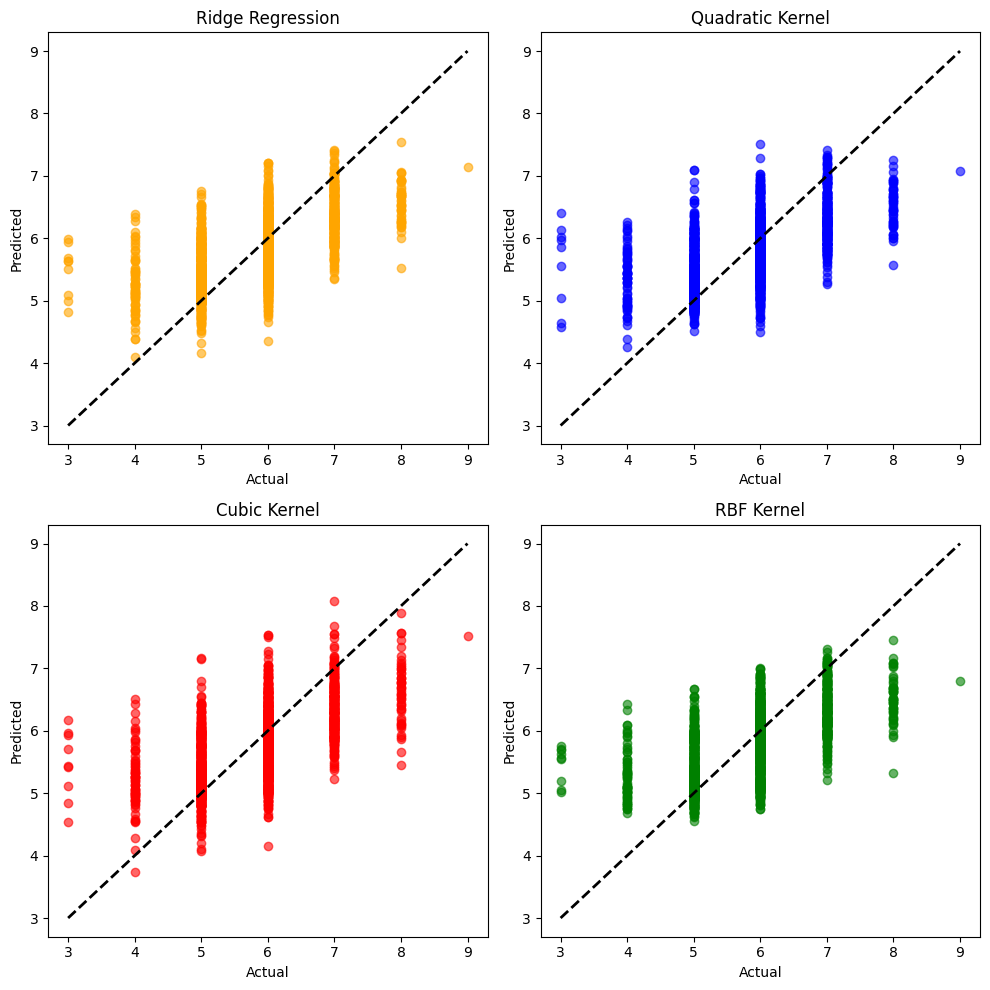

In [132]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Ridge Regression
axes[0, 0].scatter(yq_test, yq_pred_ridge, color='orange', alpha=0.6, label='Ridge Model')
axes[0, 0].plot([yq_test.min(), yq_test.max()], [yq_test.min(), yq_test.max()], 'k--', lw=2)
axes[0, 0].set_title('Ridge Regression')
axes[0, 0].set_xlabel('Actual')
axes[0, 0].set_ylabel('Predicted')

# Quadratic Kernel
axes[0, 1].scatter(yq_test, yq_pred_svm_quad, color='blue', alpha=0.6, label='Quadratic Kernel')
axes[0, 1].plot([yq_test.min(), yq_test.max()], [yq_test.min(), yq_test.max()], 'k--', lw=2)
axes[0, 1].set_title('Quadratic Kernel')
axes[0, 1].set_xlabel('Actual')
axes[0, 1].set_ylabel('Predicted')

# Cubic Kernel
axes[1, 0].scatter(yq_test, yq_pred_svm_cubic, color='red', alpha=0.6, label='Cubic Kernel')
axes[1, 0].plot([yq_test.min(), yq_test.max()], [yq_test.min(), yq_test.max()], 'k--', lw=2)
axes[1, 0].set_title('Cubic Kernel')
axes[1, 0].set_xlabel('Actual')
axes[1, 0].set_ylabel('Predicted')

# RBF Kernel
axes[1, 1].scatter(yq_test, yq_pred_svm_rbf, color='green', alpha=0.6, label='RBF Kernel')
axes[1, 1].plot([yq_test.min(), yq_test.max()], [yq_test.min(), yq_test.max()], 'k--', lw=2)
axes[1, 1].set_title('RBF Kernel')
axes[1, 1].set_xlabel('Actual')
axes[1, 1].set_ylabel('Predicted')

# Display plot
plt.tight_layout()
plt.show();


The most improved out of the four models is the RBF model as it can be seen to be closest and "more squeezed" towards the 45 degree line. This is also evident with its r2 score.

In [120]:
df_scores = pd.concat([
    show_metrics(yq_test, yq_pred_ridge, 'Ridge'),
    show_metrics(yq_test, yq_pred_svm_quad, 'SVM Quadratic Kernel'),
    show_metrics(yq_test, yq_pred_svm_cubic, 'SVM Cubic Kernel'),
    show_metrics(yq_test, yq_pred_svm_rbf, 'SVM RBF Kernel')
]).reset_index(drop=True)
df_scores

,name,mse,nmse,r2
0,Ridge,0.460080,0.630558,0.369442
1,SVM Quadratic Kernel,0.488645,0.669707,0.330293
2,SVM Cubic Kernel,0.479878,0.657691,0.342309
3,SVM RBF Kernel,0.414460,0.568033,0.431967


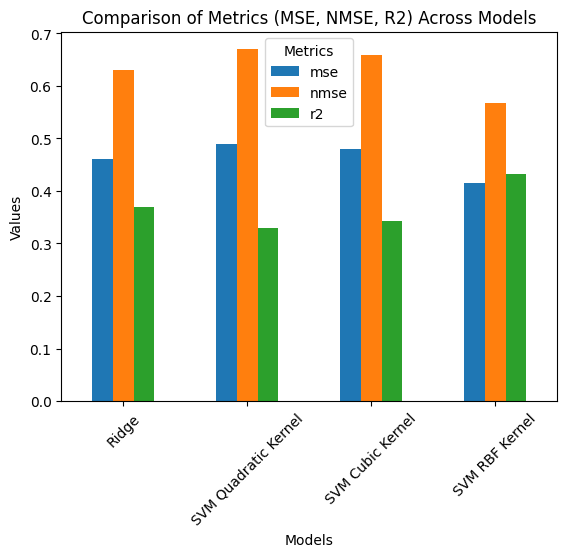

In [126]:
df_scores.set_index('name').plot(kind='bar')
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Comparison of Metrics (MSE, NMSE, R2) Across Models')
plt.xticks(rotation=45)
plt.legend(title='Metrics')


For mse and nmse, the lower the value the better as this is a measure of the squared difference of actual vs prediction. For r2, the higher the better. The model with the SVM model with RBF kernel has the lowest mse and nmse and has the highest r2 and can be observed that RBF is the better kernel choice if Support Vector Regression is the chosen algorithm. The Ridge model is still the better model when compared to an SVR with polynomial kernels. However, this is because the Ridge model was fine tuned due to the hyperparameters being searched (and has Polynomial Features) unlike the 2 SVR models which only has default hyperparameters.

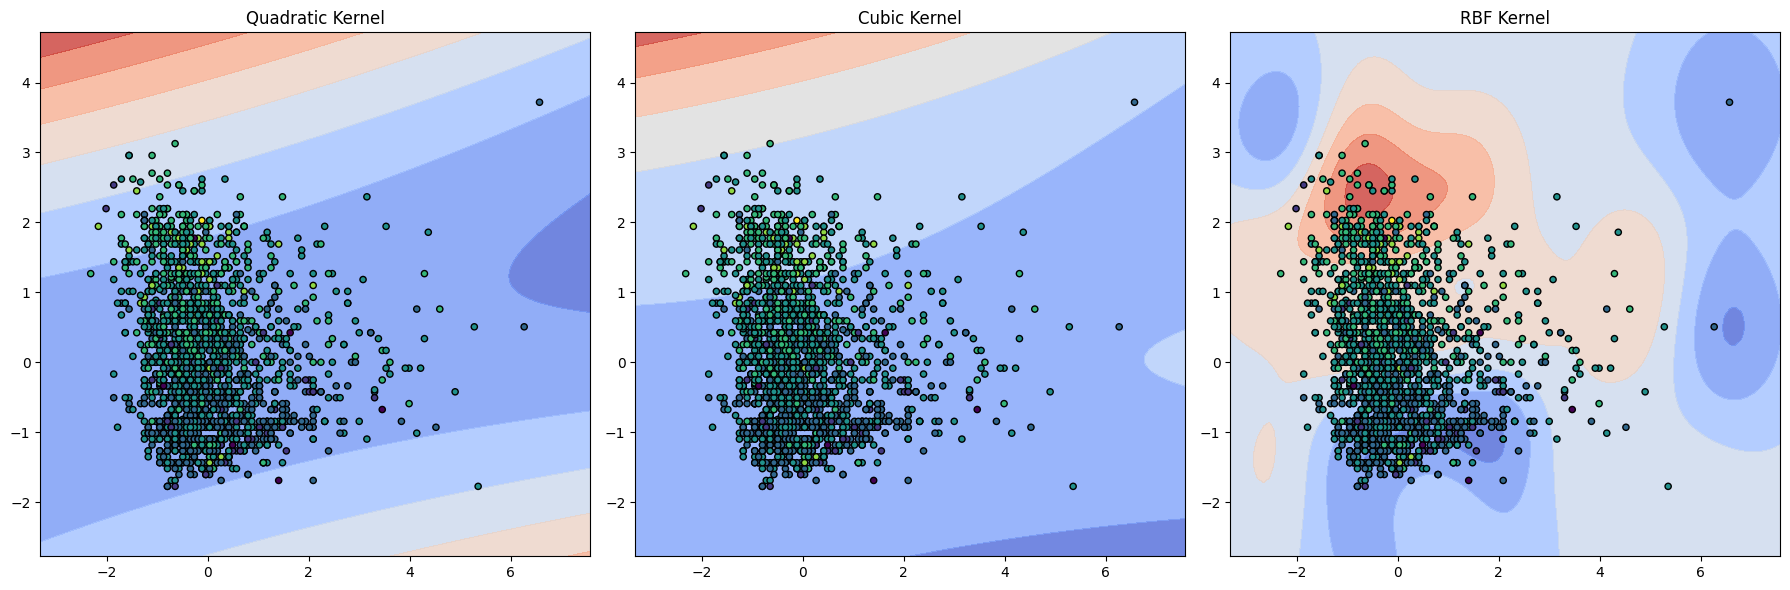

In [239]:
feature1 = 'fixed_acidity'
feature2 = 'alcohol'
X = Xq_test[[feature1, feature2]].values
y = yq_test.values.ravel()

s = StandardScaler()
X_s = s.fit_transform(X)

svr_quad = SVR(kernel='poly', degree=2).fit(X_s, y)
svr_cubic = SVR(kernel='poly', degree=3).fit(X_s, y)
svr_rbf = SVR(kernel='rbf').fit(X_s, y)

x_min, x_max = X_s[:, 0].min() - 1, X_s[:, 0].max() + 1
y_min, y_max = X_s[:, 1].min() - 1, X_s[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

Z_quad = svr_quad.predict(grid_points).reshape(xx.shape)
Z_cubic = svr_cubic.predict(grid_points).reshape(xx.shape)
Z_rbf = svr_rbf.predict(grid_points).reshape(xx.shape)

### 2D PLOT#############################################################
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Quadratic Kernel
contour = axes[0].contourf(xx, yy, Z_quad, cmap='coolwarm', alpha=0.8)
axes[0].scatter(X_s[:, 0], X_s[:, 1], c=y, s=20, edgecolor='k')
axes[0].set_title('Quadratic Kernel')

# Cubic Kernel
contour = axes[1].contourf(xx, yy, Z_cubic, cmap='coolwarm', alpha=0.8)
axes[1].scatter(X_s[:, 0], X_s[:, 1], c=y, s=20, edgecolor='k')
axes[1].set_title('Cubic Kernel')

# RBF Kernel
contour = axes[2].contourf(xx, yy, Z_rbf, cmap='coolwarm', alpha=0.8)
axes[2].scatter(X_s[:, 0], X_s[:, 1], c=y, s=20, edgecolor='k')
axes[2].set_title('RBF Kernel')

plt.tight_layout()
plt.show()

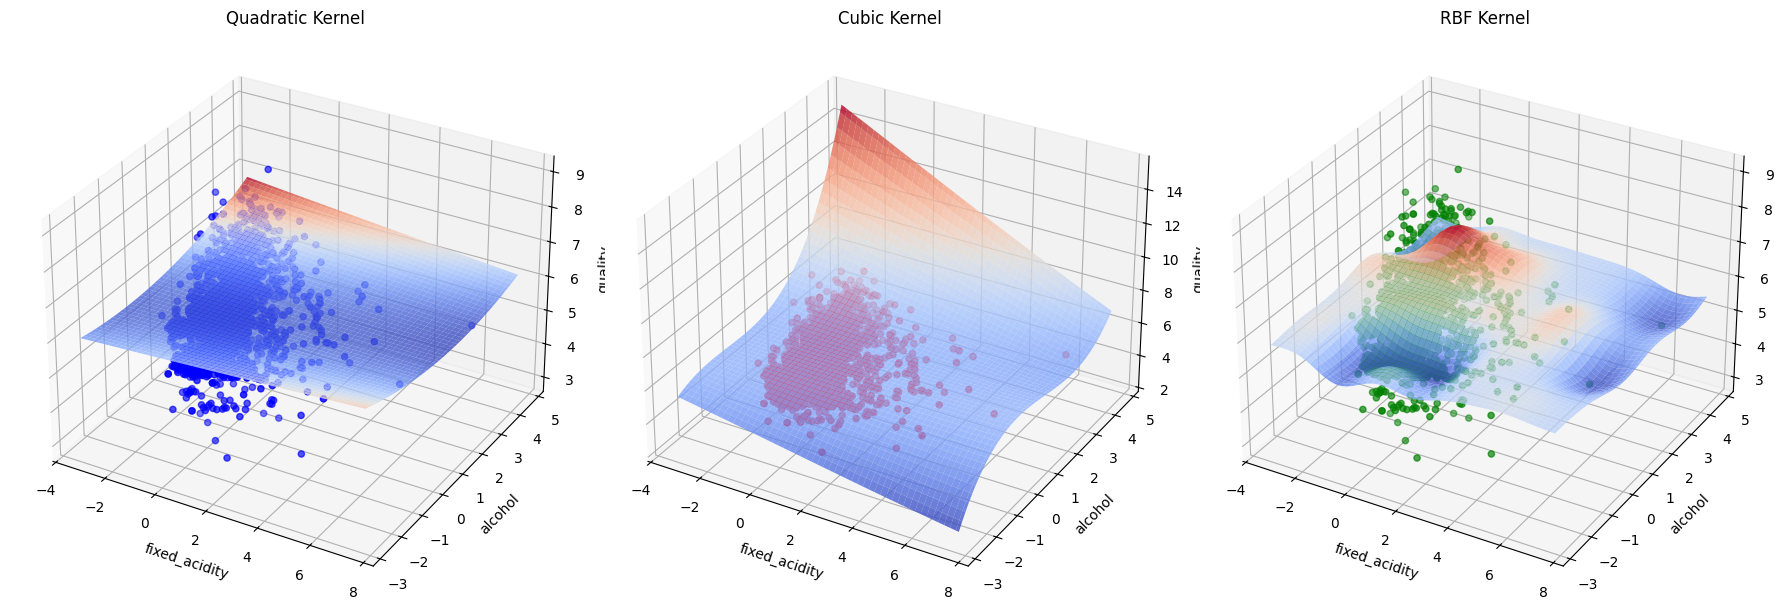

In [240]:

### 3D PLOT#############################################################
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(xx, yy, Z_quad, cmap='coolwarm', alpha=0.8)
ax.scatter(X_s[:, 0], X_s[:, 1], y, color='blue', marker='o')
ax.set_title('Quadratic Kernel')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel('quality')

# Cubic Kernel 3D plot
ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(xx, yy, Z_cubic, cmap='coolwarm', alpha=0.8)
ax.scatter(X_s[:, 0], X_s[:, 1], y, color='red', marker='o')
ax.set_title('Cubic Kernel')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel('quality')

# RBF Kernel 3D plot
ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(xx, yy, Z_rbf, cmap='coolwarm', alpha=0.8)
ax.scatter(X_s[:, 0], X_s[:, 1], y, color='green', marker='o')
ax.set_title('RBF Kernel')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel('quality')

plt.tight_layout()
plt.show()


Note that for visualization purposes, only 2 features are selected, and features are scaled using StandardScaler() instead. What the kernel does is maps the data to a higher space such that there becomes a hyperplane that is able to pass through the data points much easier than just on its original feature space. For this case however, the plane does not do a good job of passing through the data points.

* For the quadratic kernel, we try to fit the points to a quadratic surface.
* For the cubic kernel, we try to fit the points to a cubic surface.
* For the RBF kernel, the surface is quite complex due to its nature of the RBF mapping the data to an infinite dimensional space. But we can see observe that the contours can be influenced by the density of data points.